##Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [94]:
#importing the train  dataset
df_train=pd.read_csv('train.csv')
df_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [95]:
#importing the test  dataset
df_test=pd.read_csv('test.csv')
df_test.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


##EDA And Feature Engineering

Feature Engineering Techniques for Machine Learning -Deconstructing the ‘art’
1) Imputation
2) Discretization
3) Categorical Encoding
4) Feature Splitting
5) Handling Outliers
6) Variable Transformations
7) Scaling 
8) Creating Features

In [96]:
df_train.shape

(550068, 12)

In [97]:
df_test.shape

(233599, 11)

In [98]:
# in test data there is no target variable 
# preprocessing the test and train data separatly is dificult and time consuming process 
# so by append test data to the train data we new data set for easy preprocessing 

df=df_train.append(df_test)


In [99]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [100]:
df.tail(10)  # all target values for test data contains nan values

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233589,1006030,P00241442,M,26-35,17,C,1,1,2,15.0,NaN,NaN
233590,1006032,P00252442,M,46-50,7,A,3,0,8,NaN,NaN,NaN
233591,1006033,P00127642,M,51-55,13,B,1,1,1,2.0,15.0,NaN
233592,1006035,P00135742,F,26-35,1,C,3,0,6,8.0,NaN,NaN
233593,1006036,P00255442,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [101]:
df.shape

(783667, 12)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [103]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [104]:
# we need to convert the all categorical attribute into numerical attributes by using any encoding methods



In [105]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [106]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [107]:
df.head(1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0


In [108]:
print(df['Gender'].unique()) # there are two unique values are there.and there is no ordinality so it is beter to map function 

['F' 'M']


In [109]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [110]:
print(df['Age'].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [111]:
##HAndling categorical feature Age
# there is some order in the values in age attribute so i can use lable encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Age']=le.fit_transform(df['Age'])

In [112]:
df.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0
5,1,2,15,A,3,0,1,2.0,NaN,15227.0
6,1,4,7,B,2,1,1,8.0,17.0,19215.0
7,1,4,7,B,2,1,1,15.0,NaN,15854.0
8,1,4,7,B,2,1,1,16.0,NaN,15686.0
9,1,2,20,A,1,1,8,NaN,NaN,7871.0


In [113]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [114]:
print(df['City_Category'].unique())

['A' 'C' 'B']


In [115]:

df=pd.get_dummies(df, drop_first = True, columns = ['City_Category'] )


In [116]:
df.head(1)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,0,10,2,0,3,NaN,NaN,8370.0,0,0


In [117]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
City_Category_B                 uint8
City_Category_C                 uint8
dtype: object

In [118]:
df['City_Category_B']=df['City_Category_B'].astype(int)

In [119]:
df['City_Category_C']=df['City_Category_C'].astype(int)

In [120]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
City_Category_B                 int64
City_Category_C                 int64
dtype: object

In [121]:
print(df['Stay_In_Current_City_Years'].unique())

['2' '4+' '3' '1' '0']


In [122]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [123]:
print(df['Stay_In_Current_City_Years'].unique())

['2' '4' '3' '1' '0']


In [124]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
City_Category_B                 int64
City_Category_C                 int64
dtype: object

In [125]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [126]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
City_Category_B                 int64
City_Category_C                 int64
dtype: object

all categorical attributes are converted into integers

Missing values handling

In [127]:
## Missing Values
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [128]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [129]:
type(df['Product_Category_2'].unique())

numpy.ndarray

In [130]:
# it is categorical attribute so it is better to use mode imputation
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [131]:
df['Product_Category_2'].mode()[0]

8.0

In [132]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [133]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [134]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [135]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [136]:
df['Product_Category_3'].mode()[0]

16.0

In [137]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [138]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [139]:
# purchase attribute is target column so it is having null values that indicate it isd a test data


#visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


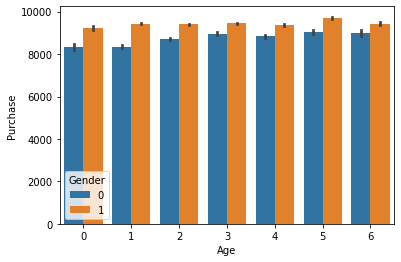

In [140]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

In [141]:
#observatiioon
# all age group people are almost equaly purchase the products
# for all age group females are less purchase than males

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


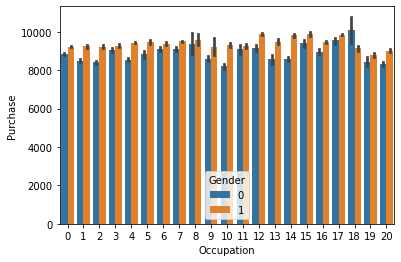

In [142]:
##Visualisation Occupation vs Purchased
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

#observation

all occupation  people are almost equaly purchase the products
for all occupation group females are less purchase than males except at 18 occupation more purchase by the females than male



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


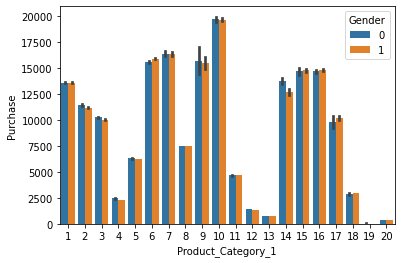

In [143]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

by the observation in  Product_Category_1  10th product category purchases are more and 19th  product category purchases are lesss

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


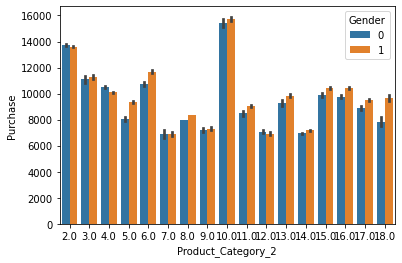

In [144]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


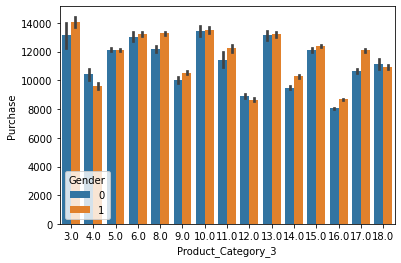

In [145]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

by these three observations for Product_Category_2 has having more purchases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


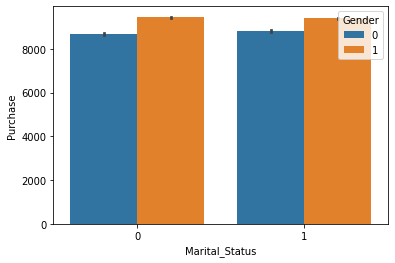

In [146]:
sns.barplot('Marital_Status','Purchase',hue='Gender',data=df)

In [147]:
Age_group=df.Age.value_counts().index 

In [148]:
Age_val=df.Age.value_counts().values

([<matplotlib.patches.Wedge at 0x7fa1441176d0>,
 [Text(0.34181293462813084, 1.0455447946983933, '2'),
  Text(-1.0999926321979865, 0.004026053917388753, '3'),
  Text(-0.40505777022089384, -1.0227063130653284, '1'),
  Text(0.4820701905466641, -0.9887407806833413, '4'),
  Text(0.885029495234752, -0.6532402257703671, '5'),
  Text(1.0529178592425998, -0.3183771060990111, '6'),
  Text(1.095979511458728, -0.09396228212792682, '0')],
 [Text(0.18644341888807137, 0.570297160744578, '39.94%'),
  Text(-0.5999959811989016, 0.002196029409484774, '20.00%'),
  Text(-0.22094060193866935, -0.5578398071265428, '18.11%'),
  Text(0.2629473766618168, -0.5393131531000043, '8.33%'),
  Text(0.48274336103713744, -0.35631285042020017, '6.99%'),
  Text(0.5743188323141453, -0.17366023969036967, '3.90%'),
  Text(0.5978070062502152, -0.05125215388796008, '2.72%')])

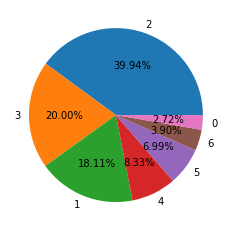

In [149]:
plt.pie(Age_val,labels=Age_group,autopct='%1.2f%%')

In [150]:
marital_Names=df.Marital_Status.value_counts().index 

In [151]:
marital_val=df.Marital_Status.value_counts().values

([<matplotlib.patches.Wedge at 0x7fa1440853d0>,
 [Text(-0.30762903603285247, 1.0561081271297452, '0'),
  Text(0.30762913491282995, -1.0561080983274316, '1')],
 [Text(-0.1677976560179195, 0.5760589784344065, '59.02%'),
  Text(0.16779770995245266, -0.5760589627240535, '40.98%')])

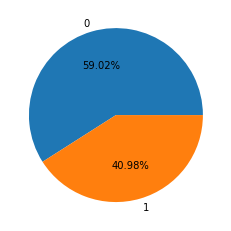

In [152]:
plt.pie(marital_val,labels=marital_Names,autopct='%1.2f%%')

In [153]:
# to separete the test and train data 
df_test=df[df['Purchase'].isnull()].head()

In [154]:
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [155]:
df_test.drop('Purchase',axis=1,inplace=True)

In [156]:
df_test.shape

(5, 10)

In [157]:
df_train=df[~df['Purchase'].isnull()]

In [158]:
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,2,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,2,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,6,1,2,0,20,8.0,16.0,365.0,0,1


In [159]:
df_train.shape

(550068, 11)

In [160]:
X= df_train.drop('Purchase',axis=1)

In [161]:
y=df_train['Purchase']

In [162]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

##Feature scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [164]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model bulilding

In [165]:
#from sklearn.ensemble import RandomForestClassifier
#Rfg=RandomForestClassifier()

In [166]:
#Rfg.fit(X_train,y_train)



In [167]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 8)
#classifier.fit(X_train, y_train)

In [168]:
#y_pred = classifier.predict(X_test)

In [169]:
#y_pred

In [170]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4198.557381754569
RMSE value for k=  2 is: 3733.488394522439
RMSE value for k=  3 is: 3587.9720688986
RMSE value for k=  4 is: 3535.6249422487
RMSE value for k=  5 is: 3509.5320252474985
RMSE value for k=  6 is: 3503.956441372486
RMSE value for k=  7 is: 3505.568923637098
RMSE value for k=  8 is: 3513.7675877653714
RMSE value for k=  9 is: 3524.667560275125
RMSE value for k=  10 is: 3534.5746200409026


In [186]:
#from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

#knn = neighbors.KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=5)
#model.fit(X_train,y_train)
#model.best_params_

In [172]:
pred #predictions on x_test data

array([ 7068.6,  6656.3, 11789.8, ...,  6620.1, 13227. , 14322.4])

In [173]:
#predicting on the test set and creating submission file
predict = model.predict(df_test)
#submission.to_csv('submit_file.csv',index=False)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [174]:
predict #predictions on test data

array([ 7340.1,  8938.6, 16530.9, 13825.4, 15259.3])

In [176]:
#submission = pd.read_csv('SampleSubmission.csv')
#submission['Item_Identifier'] = test['Item_Identifier']
#submission['Outlet_Identifier'] = test['Outlet_Identifier']

#submission.to_csv('submit_file.csv',index=False)


In [185]:
y_train.shape

(385047,)

In [182]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [183]:
y_pred

array([ 7780.        ,  6474.57142857, 10831.42857143, ...,
        7399.28571429, 13929.85714286, 14332.85714286])